## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [99]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv


--2022-03-01 22:29:58--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275201 (269K) [text/plain]
Saving to: ‘german_credit.csv.6’

german_credit.csv.6 100%[===================>] 268.75K  --.-KB/s    in 0.07s   

2022-03-01 22:29:59 (3.91 MB/s) - ‘german_credit.csv.6’ saved [275201/275201]



In [3]:
data = pd.read_csv('german_credit.csv')

In [4]:
data


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. 

# Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [6]:
data.describe() 

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [7]:
print('Количественные:  duration, amount, age')
print('Бинарные: credit_risk, foreign_worker, telephone')
print('Порядковые: status, savings, employment_duration, installment_rate,present_residence, number_credits, people_liable, telephone, foreign_worker, credit_risk')
print('Категориальные: credit_history, purpose, personal_status_sex, housing, other_installment_plans, other_debtorsproperty')

Количественные:  duration, amount, age
Бинарные: credit_risk, foreign_worker, telephone
Порядковые: status, savings, employment_duration, installment_rate,present_residence, number_credits, people_liable, telephone, foreign_worker, credit_risk
Категориальные: credit_history, purpose, personal_status_sex, housing, other_installment_plans, other_debtorsproperty


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
gr = data.groupby(by='purpose')
gr.mean()['amount']

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
a = len(data[(data['age'] < 30) & (data['housing'] == 'rent')])
b = len(data[data['age']<30])
print(a/b*100, '% клиентов моложе 30 лет снимает жилье')
a = len(data[(data['age'] > 40) & (data['housing'] == 'rent')])
b = len(data[data['age']>30])
print(a/b*100, '% клиентов старше 40 лет снимает жилье')

66.66666666666666 % клиентов моложе 30 лет снимает жилье
31.302876480541453 % клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [11]:
a = len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1')& (data['number_credits'] != '2-3')])
print(a, 'иностранец имеет число кредитов больше 3')


1 иностранец имеет число кредитов больше 3


### Задание 6 (1 балл)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

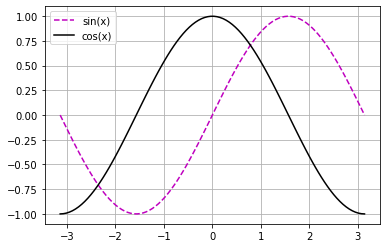

In [13]:
x = np.linspace(-np.pi, np.pi, num = 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y,'--m',  label = 'sin(x)')
plt.plot(x, z,'k', label = 'cos(x)')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [14]:
data1 = data[data['credit_risk'] == 'good']

gr = data1.groupby(by='status')
status_good = gr['credit_risk'].size()
data2 = data[data['credit_risk'] == 'bad']

gr = data2.groupby(by='status')
status_bad = gr['credit_risk'].size()

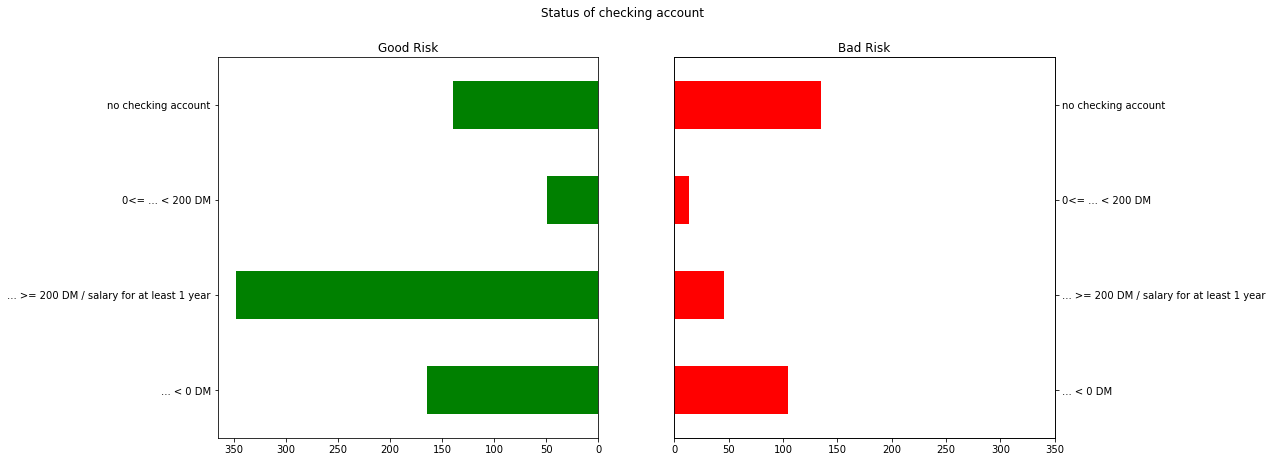

In [15]:
fig, ax = plt.subplots(figsize = (15,7), nrows=1, ncols =2)
status_good.plot(kind = "barh", ax=ax[0], title = 'Good Risk', color = 'g')
fig.suptitle("Status of checking account")
ax[0].invert_xaxis()
plt.xlim([0,350])
ax1 = ax[1].twinx()
ax[1].set_yticklabels([])
ax[1].set_yticks([]) 
status_bad.plot(kind = "barh", ax = ax1, title = 'Bad Risk', color = 'r')
ax[0].set(ylabel=None)
ax1.set(ylabel=None)
plt.show()

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

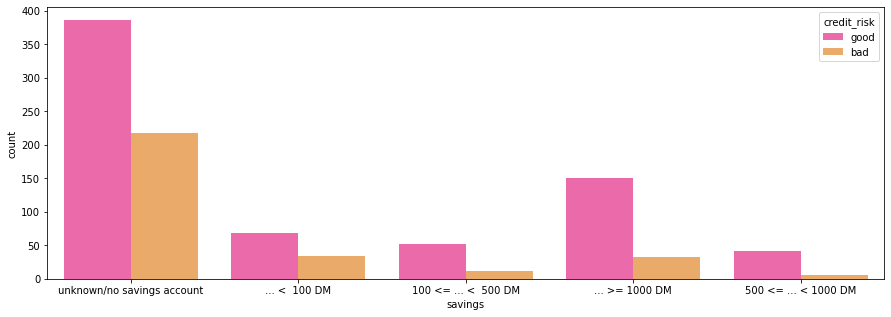

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette='spring')
plt.show()

Мне больше понравился seaborn это точно.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

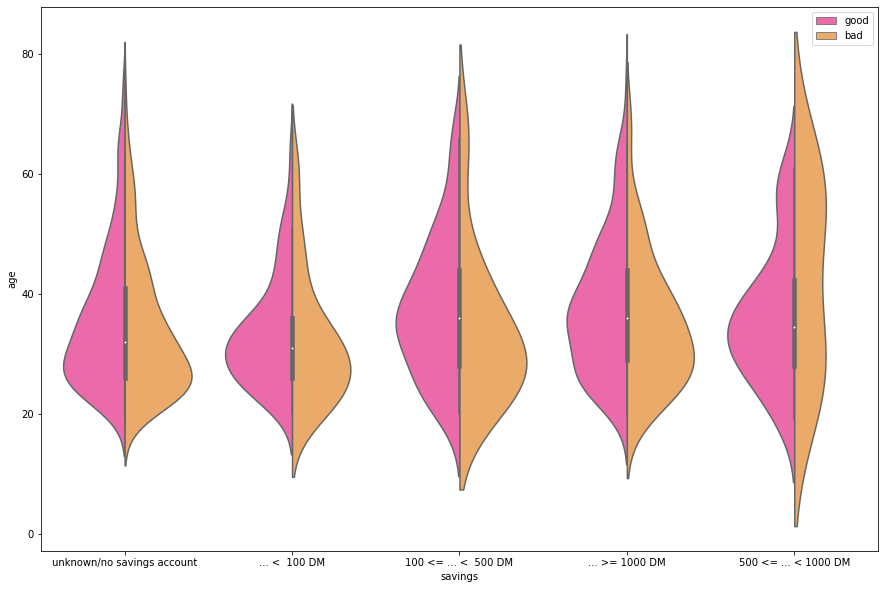

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x = 'savings', y = 'age', hue = 'credit_risk',data=data, palette='spring', split = True)
plt.legend()
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [19]:
import matplotlib.patches as mpatches

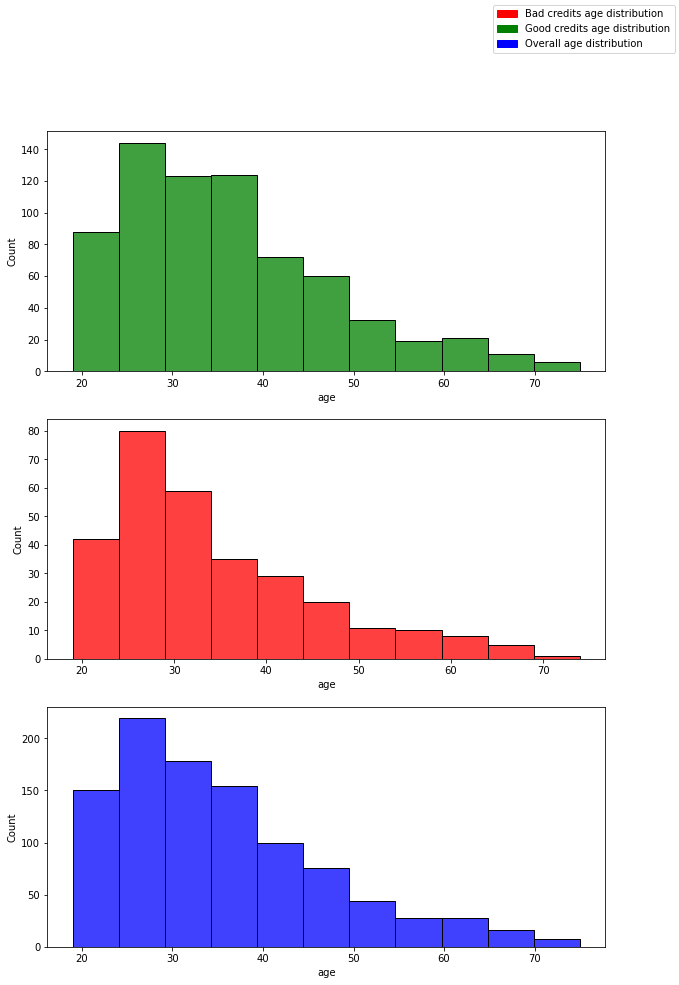

In [20]:
fig, ax = plt.subplots(figsize = (10,15), nrows=3, ncols =1)
sns.histplot(x='age', data=data, ax=ax[2], bins = 11, color = 'b')

sns.histplot(x='age', data=data1, ax=ax[0], bins = 11, color = 'g')
sns.histplot(x='age', data=data2, ax=ax[1], bins = 11, color = 'r')
red_patch = mpatches.Patch(color='red', label='Bad credits age distribution')
green_patch = mpatches.Patch(color='green', label='Good credits age distribution')
blue_patch = mpatches.Patch(color='blue', label='Overall age distribution')
fig.legend(handles=[red_patch, green_patch, blue_patch ])
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

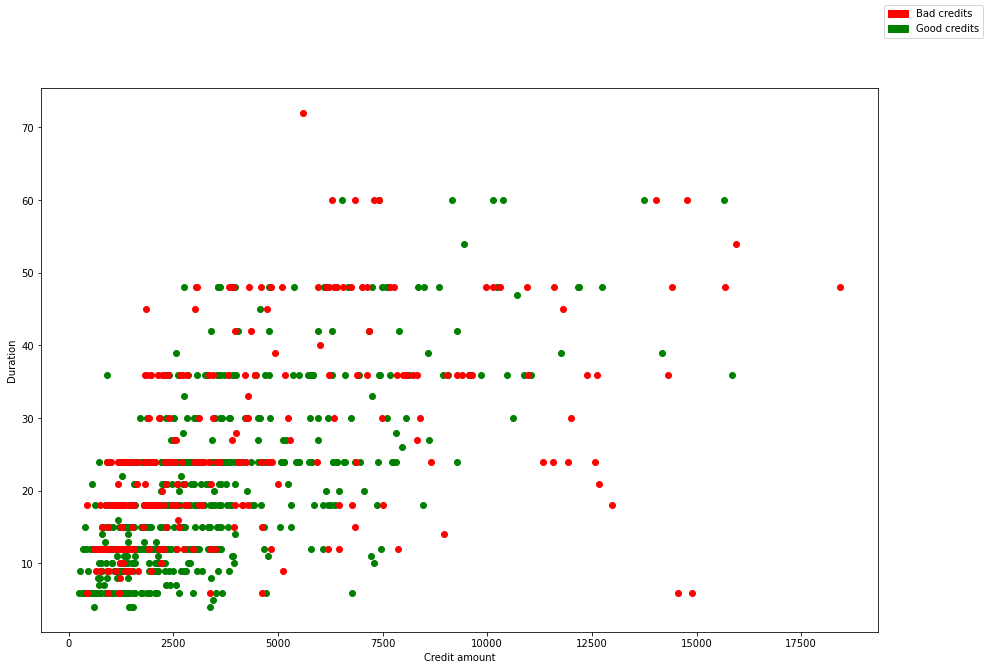

In [21]:
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(x = 'amount', y = 'duration', data=data1, color = 'g')
plt.scatter(x = 'amount', y = 'duration', data=data2, color = 'r')
ax.set(ylabel='Duration', xlabel = 'Credit amount')
green_patch = mpatches.Patch(color='green', label='Good credits')
red_patch = mpatches.Patch(color='red', label='Bad credits')
fig.legend(handles=[red_patch, green_patch])
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

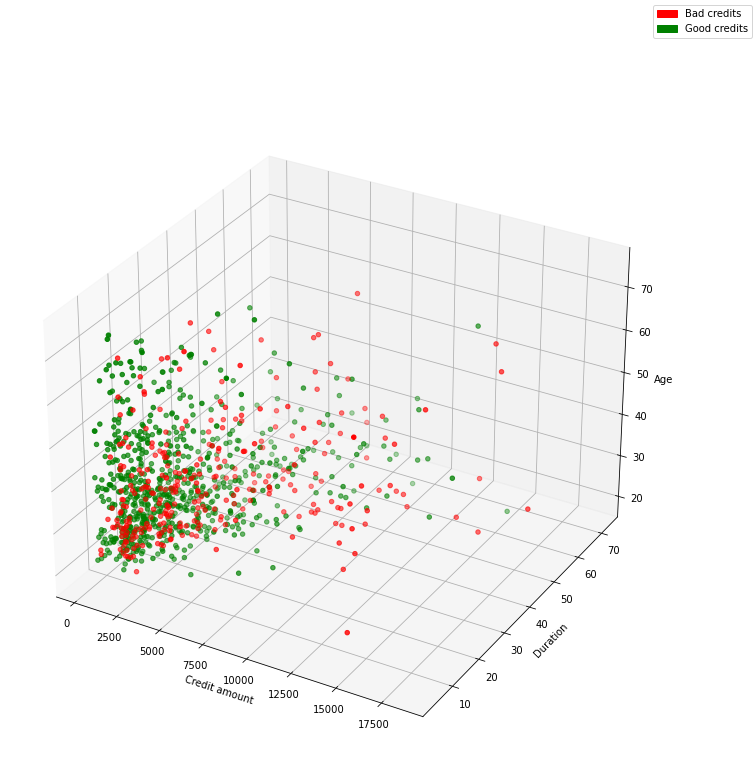

In [22]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_vals = data1['amount']
y_vals = data1['duration']
z_vals = data1['age']
ax.scatter(x_vals, y_vals, z_vals, color = 'g')
x_vals_2 = data2['amount']
y_vals_2 = data2['duration']
z_vals_2 = data2['age']
ax.scatter(x_vals_2, y_vals_2, z_vals_2, color = 'r')
ax.set(ylabel='Duration', xlabel = 'Credit amount', zlabel = 'Age')
green_patch = mpatches.Patch(color='green', label='Good credits')
red_patch = mpatches.Patch(color='red', label='Bad credits')
fig.legend(handles=[red_patch, green_patch])
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [23]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [24]:
for i in data.columns: 
    print(i, data[i].value_counts())

status ... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64
duration 24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64
credit_history no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64
purpose furniture/equipment    280
others                 234
car (used)             181
car 

In [25]:
data['status'] = data['status'].map({'... >= 200 DM / salary for at least 1 year': 3,
                                     'no checking account':0,
                                     '... < 0 DM':1,
                                     '0<= ... < 200 DM':2})

In [26]:
data['savings'] = data['savings'].map({'unknown/no savings account': 0,
                                     '... <  100 DM':1,
                                     '100 <= ... <  500 DM':2,
                                     '500 <= ... < 1000 DM':3,
                                     '... >= 1000 DM':4})

In [27]:
data['employment_duration'] = data['employment_duration'].map({'unemployed': 0,
                                     '< 1 yr':1,
                                     '1 <= ... < 4 yrs':2,
                                     '4 <= ... < 7 yrs':3,
                                     '>= 7 yrs':4})

In [28]:
data['installment_rate'] = data['installment_rate'].map({'< 20': 0,
                                     '20 <= ... < 25':1,
                                     '25 <= ... < 35':2,
                                     '>= 35':3})

In [29]:
data['present_residence'] = data['present_residence'].map({'< 1 yr': 0,
                                     '1 <= ... < 4 yrs':1,
                                     '4 <= ... < 7 yrs':2,
                                     '>= 7 yrs':3})

In [30]:
data['number_credits'] = data['number_credits'].map({'1': 0,
                                     '2-3':1,
                                     '4-5':2,
                                     '>= 6':3})

In [31]:
data['people_liable'] = data['people_liable'].map({'0 to 2': 0,
                                     '3 or more':1})

In [32]:
data['telephone'] = data['telephone'].map({'no': 0,
                                     'yes (under customer name)':1})

In [33]:
data['foreign_worker'] = data['foreign_worker'].map({'no': 0,
                                     'yes':1})

In [34]:
data['credit_risk'] = data['credit_risk'].map({'bad': 0,
                                     'good':1})

In [35]:
del data['credit_history']

In [36]:
del data['purpose']
del data['personal_status_sex']
del data['other_debtors']
del data['property']
del data['other_installment_plans']
del data['housing']
del data['job']

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [37]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0.000000,0.205882,0.043964,0.00,0.25,0.000000,1.000000,0.035714,0.000000,0.0,0.0,0.0,1.0
1,0.000000,0.073529,0.140255,0.00,0.50,0.666667,0.333333,0.303571,0.333333,1.0,0.0,0.0,1.0
2,0.333333,0.117647,0.032519,0.25,0.75,0.666667,1.000000,0.071429,0.000000,0.0,0.0,0.0,1.0
3,0.000000,0.117647,0.103004,0.00,0.50,0.333333,0.333333,0.357143,0.333333,1.0,0.0,1.0,1.0
4,0.000000,0.117647,0.105700,0.00,0.50,0.000000,1.000000,0.339286,0.333333,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.294118,0.095576,0.00,0.50,0.666667,1.000000,0.035714,0.000000,1.0,0.0,0.0,0.0
996,0.000000,0.294118,0.112964,0.00,1.00,0.000000,0.000000,0.464286,0.000000,0.0,0.0,0.0,0.0
997,1.000000,0.250000,0.683944,1.00,1.00,0.000000,1.000000,0.196429,0.000000,0.0,1.0,0.0,0.0
998,0.333333,0.117647,0.342137,1.00,0.00,0.666667,0.000000,0.589286,0.000000,0.0,1.0,0.0,0.0


<AxesSubplot:>

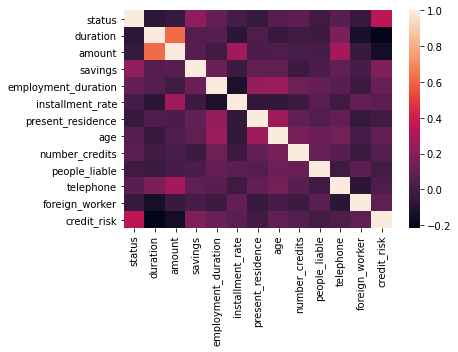

In [38]:
sns.heatmap(data.corr())

Единственная хоть сколько-то значительная корреляция с credit_risk, которую я вижу, это корреляция между статусом и credit_risk. Поэтому в модели я буду просто сравнивать со средним значением по status.

In [39]:
data1_norm = data[data['credit_risk'] == 1]

In [40]:
data1_norm.describe()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,0.621905,0.223634,0.150514,0.322500,0.618929,0.360000,0.614286,0.307500,0.141429,0.155714,0.415714,0.047143,1.0
std,0.409585,0.162935,0.132139,0.412836,0.297610,0.376026,0.369458,0.202633,0.194907,0.362844,0.493197,0.212096,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.333333,0.117647,0.061929,0.000000,0.500000,0.000000,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.666667,0.205882,0.109717,0.000000,0.500000,0.333333,0.666667,0.267857,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,0.294118,0.186241,0.750000,1.000000,0.666667,1.000000,0.410714,0.333333,0.000000,1.000000,0.000000,1.0
max,1.000000,0.823529,0.858754,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [41]:
r = []
def predict(Xtest: np.array) -> np.array:
    for i in Xtest: 
        if i[0] >= 0.62:
            r.append(1)
        else:
            r.append(0)
    return r
        

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


accuracy_score(y_test, predict(X_test))

0.628